In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from scipy import signal
import numpy as np
import scipy
from scipy import signal
from scipy.ndimage.morphology import binary_dilation as bd
import scipy.ndimage as ndimage
from functools import partial
import multiprocessing
import numpy.ma as ma
from collections import Counter
import pylab as plt
%matplotlib inline

In [23]:
def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2.: center[0]+xwin/2., center[1]-ywin/2.:center[1]+ywin/2.]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

In [3]:
results = []
for j in range(5):
    if j ==4:
        for i in range(43):
            results.append(parallel_rw_pkl(None, '2906test%igaus%02d'%(j+1,i), 'r'))
    else:
        for i in range(200):
            try:
                results.append(parallel_rw_pkl(None, '2906test%igaus%02d'%(j+1,i), 'r'))
            except:
                pass

In [4]:
xstd = []
ystd = []
angle = []
sx = []
sy = []
brdf = []
vals = []
indx = []
indy = []
for l in results:
    if l is None:
        pass
    else:
        for i in l:
            for j,k in enumerate([xstd, ystd, angle, sx, sy , brdf, vals, indx, indy]):
                try:
                    k.append(i[j])
                except:
                    pass

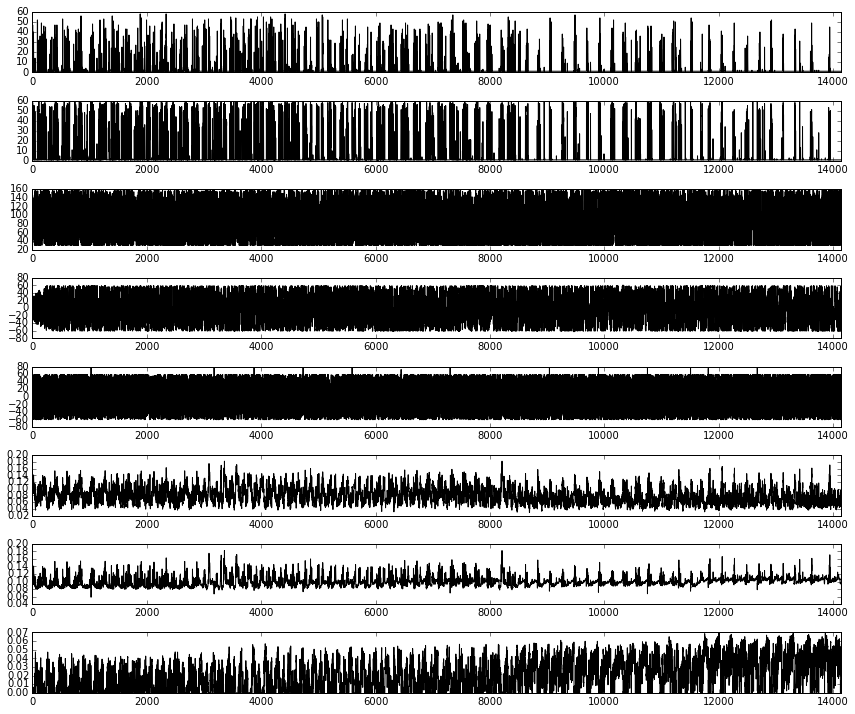

In [5]:
fig = plt.figure(figsize = (12,10))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    ax.plot(l, color='k')
    ax.set_xlim(0, len(l))
    #fig.colorbar(im)
plt.tight_layout()

LinregressResult(slope=1.0026501544195747, intercept=-0.00032321383467499853, rvalue=0.99939209167138476, pvalue=0.0, stderr=0.00068190068108948661)


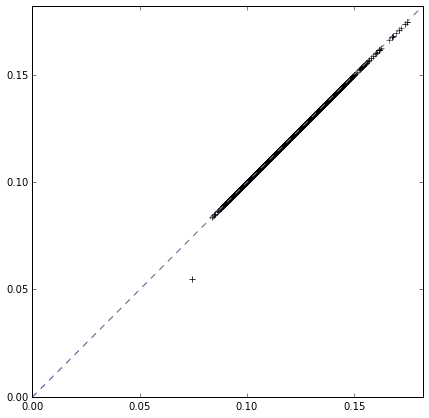

In [6]:
a = np.array(brdf)[np.array(xstd)>1.0001]
b = np.array(vals)[np.array(xstd)>1.0001]
op_cost = np.array(zip(a, b))
plt.figure(figsize = (7,7))
maxval = np.nanmax(op_cost)
r = scipy.stats.linregress(op_cost[:,1],op_cost[:,0])

fit = np.polyfit(op_cost[:,1],op_cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(op_cost[:,1],op_cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
print r

LinregressResult(slope=0.84699856697818698, intercept=-0.010137486768728415, rvalue=0.40911305607191595, pvalue=0.0, stderr=0.017619398372933855)


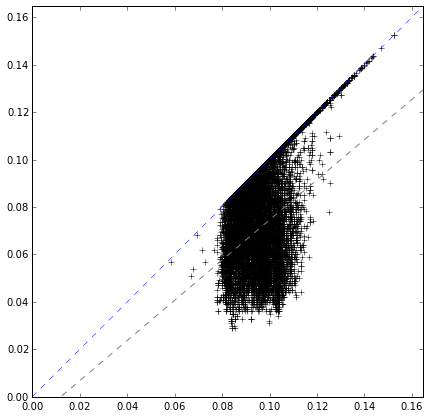

In [7]:
a = np.array(brdf)[np.array(xstd)<=1.0001]
b = np.array(vals)[np.array(xstd)<=1.0001]
op_cost = np.array(zip(a, b))
plt.figure(figsize = (7,7))
maxval = np.nanmax(op_cost)
r = scipy.stats.linregress(op_cost[:,1],op_cost[:,0])

fit = np.polyfit(op_cost[:,1],op_cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(op_cost[:,1],op_cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
print r

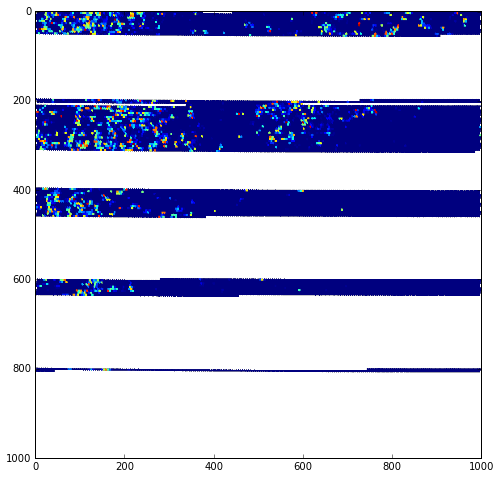

In [8]:
plt.figure(figsize = (8,8))
data = np.zeros((10980,10980))
data[:] = np.nan
for i,j in enumerate(xstd):
    data[indx[i], indy[i]] = j
plt.imshow(data[:10000:10,:10000:10])

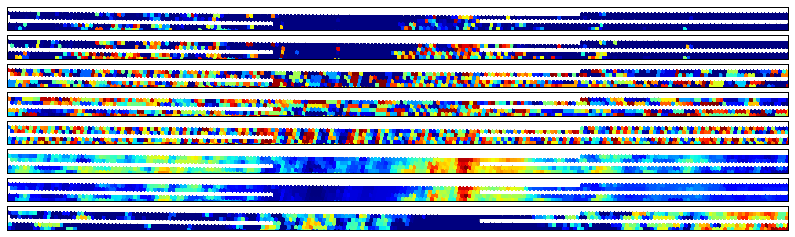

In [9]:
fig = plt.figure(figsize = (14,4))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    data = np.zeros((10980,10980))
    data[:] = np.nan
    for i,j in enumerate(l):
        data[indx[i], indy[i]] = j
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    im = ax.imshow(data[1900:2200,:9900])
    #ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=0)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

In [10]:
np.array(brdf)

array([ 0.12825707,  0.12010077,  0.12794286, ...,  0.091     ,
        0.09464831,  0.08335482])

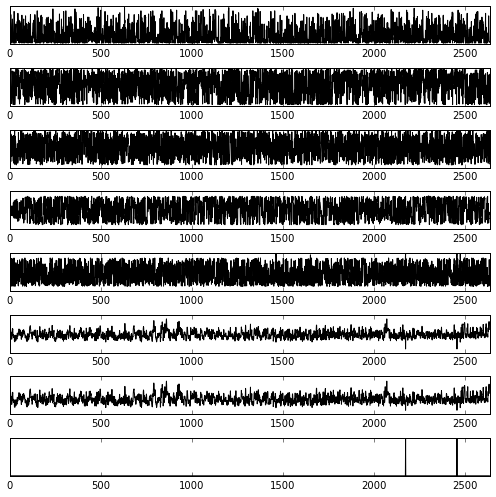

In [11]:
optimal1 = np.array(xstd)>1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , np.array(brdf), np.array(vals),abs(np.array(brdf)-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    ax.plot(data[optimal1], color='k')
    ax.set_xlim(0, len(data[optimal1]))
    #fig.colorbar(im)
    ax.get_yaxis().set_ticks([])
plt.tight_layout()

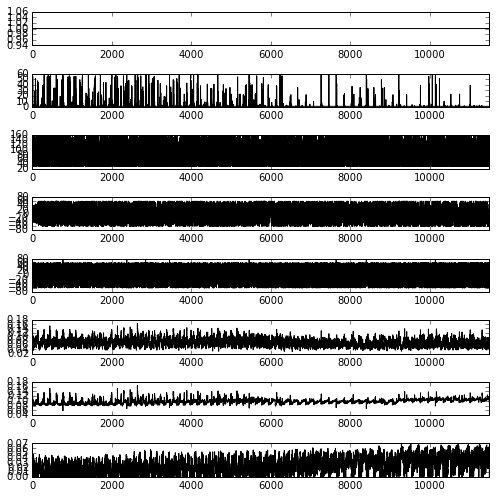

In [12]:
optimal2 = np.array(xstd)<=1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    ax.plot(data[optimal2], color='k')
    ax.set_xlim(0, len(data[optimal2]))
    #fig.colorbar(im)
plt.tight_layout()

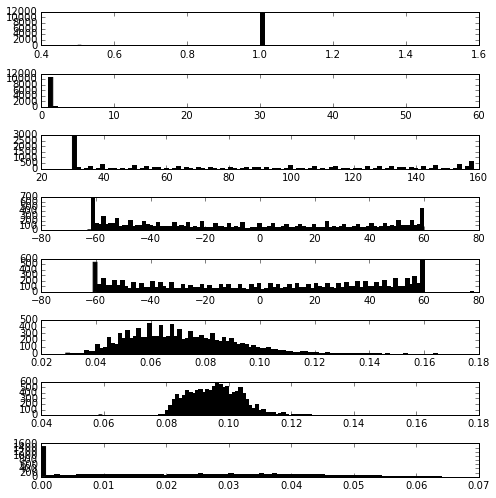

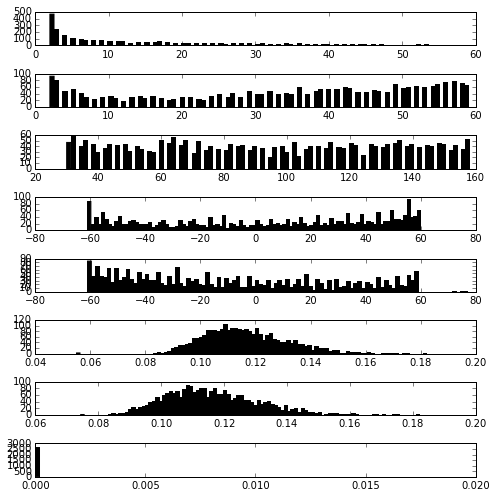

In [13]:
optimal2 = np.array(xstd)<=1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    a,b,c = ax.hist(data[optimal2], color='k', bins = 100)
    
    #fig.colorbar(im)
plt.tight_layout()

optimal1 = np.array(xstd)>1.0001
fig = plt.figure(figsize = (7,7))
for k,l in enumerate([xstd, ystd, angle, sx, sy , brdf, vals,abs(brdf-np.array(vals))]):
    data = np.array(l)
    pind = int('81%s'%(k+1))
    ax = fig.add_subplot(pind)
    a,b,c = ax.hist(data[optimal1], color='k', bins = 100)
    #fig.colorbar(im)
plt.tight_layout()

In [15]:
sdtx = np.array(xstd)[optimal1]
stdx = sdtx[sdtx<30]
stdx.mean()

9.635626921306951

In [16]:
Sent = parallel_rw_pkl(None, 'band4', 'r')

In [17]:
inds = pkl.load(open('pkls/gaus_trans.pkl','rb'))
vx,vy = pkl.load(open('pkls/gaus_valid.pkl','rb'))

In [24]:
means = []
for k,l in enumerate([xstd, ystd, angle, sx, sy]):
    data = np.array(l)
    means.append((data[optimal1]).mean())
xwin, ywin = 100, 100
xst,yst,angl, xs, ys = means

test = Sent.copy()
gaus = gaussian(xwin,ywin,xst,yst,angl,False)                            
temp_array = np.zeros((100, 250))
temp_array[inds[1], inds[0]] = gaus.ravel()
valid  = temp_array[vx,vy]

nx = vx-vx.min()
ny = vy-vy.min()
winx = nx.max()+1
winy = ny.max()+1
kernel = np.zeros((winx,winy))
kernel[nx,ny] = valid 
ker = kernel/(kernel.sum())

conveds = []
for i,j in enumerate(indx):
    x = j-int(round(xs))
    y = indy[i]-int(round(ys))
    xmax = np.max(x)
    xmin = np.min(x)
    ymax = np.max(y)
    ymin = np.min(y)
    to_conv = test[xmin:xmin+55,ymin:ymin+47]
    conved = signal.fftconvolve(to_conv, ker, mode='valid')
    if list(conved) == []:
        conveds.append(0)
        
    else:
        conveds.append((conved)[0][0])

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [346]:
means, std

([14.922965013774107,
  34.504232231404956,
  91.663911845730027,
  3.2672176308539944,
  -7.333333333333333],
 [13.916500325993479,
  17.765130035651772,
  39.342915578094441,
  37.307783953192548,
  38.313217862685093])

In [ ]:
parameters  = []
start = 1000
for xst in np.arange(1.001, 29, 1):
    for yst in np.arange(17, 51, 1):
        for angl in np.arange(50, 140, 1):
            for xs in np.arange(-34, 40, 1):
                for ys in np.arange(-50, 31, 1):
                    test = Sent.copy()
                    gaus = gaussian(xwin,ywin,xst,yst,angl,False)                            
                    temp_array = np.zeros((100, 250))
                    temp_array[inds[1], inds[0]] = gaus.ravel()
                    valid  = temp_array[vx,vy]

                    nx = vx-vx.min()
                    ny = vy-vy.min()
                    winx = nx.max()+1
                    winy = ny.max()+1
                    kernel = np.zeros((winx,winy))
                    kernel[nx,ny] = valid 
                    ker = kernel/(kernel.sum())

                    conveds = []
                    for i,j in enumerate(indx):
                        x = j-int(round(xs))
                        y = indy[i]-int(round(ys))
                        xmax = np.max(x)
                        xmin = np.min(x)
                        ymax = np.max(y)
                        ymin = np.min(y)
                        to_conv = test[xmin:xmin+55,ymin:ymin+47]
                        conved = signal.fftconvolve(to_conv, ker, mode='valid')
                        if list(conved) == []:
                            conveds.append(0)

                        else:
                            conveds.append((conved)[0][0])
                    mask = np.array(conveds) !=0
                    rang = min(len(conveds), len(brdf))
                    conveds = np.array(conveds[:rang])[mask[:rang]]
                    
                    brdf = np.array(brdf[:rang])[mask[:rang]]
                    errors = (abs(conveds-brdf)).sum()
                    if errors <start:
                        parameters.append([xst,yst,angl, xs, ys ])
                        print 'find one!!'
                        start = errors

LinregressResult(slope=0.82376088185104734, intercept=-0.027101232753346596, rvalue=0.67947105650124273, pvalue=0.0, stderr=0.0074968636189945547)


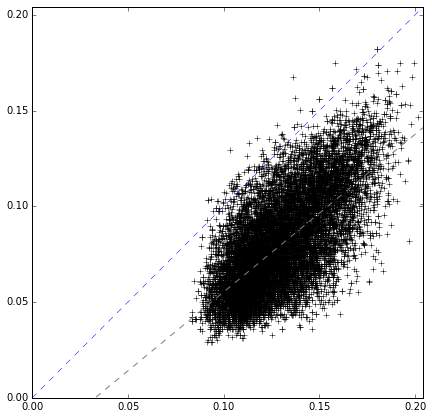

In [25]:
mask = np.array(conveds) !=0
op_cost = np.array(zip(np.array(np.array(brdf)[mask]), np.array(np.array(conveds)[mask])))
plt.figure(figsize = (7,7))
maxval = np.nanmax(op_cost)
r = scipy.stats.linregress(op_cost[:,1],op_cost[:,0])

fit = np.polyfit(op_cost[:,1],op_cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(op_cost[:,1],op_cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
print r

LinregressResult(slope=0.82376088185104734, intercept=-0.027101232753346596, rvalue=0.67947105650124273, pvalue=0.0, stderr=0.0074968636189945547)


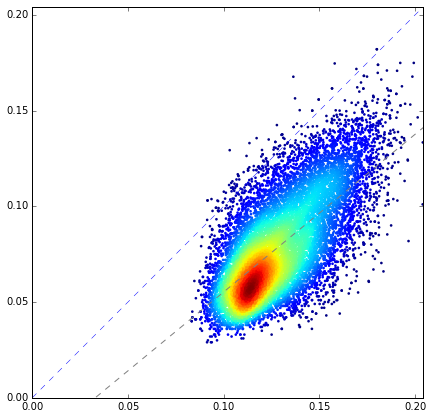

In [26]:
from scipy.stats import gaussian_kde
# x is brdf, y is the Sentinel
x,y = np.array(np.array(brdf)[mask]), np.array(np.array(conveds)[mask])


xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

In [ ]:
bias = (1./len(x))*(x-y).sum()
RMSEa = np.sqrt((1./len(x))*((x-y)**2).sum())
RMSEr = (RMSEa/y).sum()*100

In [344]:
std = []
for k,l in enumerate([xstd, ystd, angle, sx, sy]):
    data = np.array(l)
    std.append((data[optimal1]).std())

In [237]:
means = []
for k,l in enumerate([xstd, ystd, angle, sx, sy]):
    data = np.array(l)
    means.append((data[optimal2]).mean())
xwin, ywin = 100, 100
xst,yst,angl, xs, ys = means

test = Sent.copy()
gaus = gaussian(xwin,ywin,xst,yst,angl,False)                            
temp_array = np.zeros((100, 250))
temp_array[inds[1], inds[0]] = gaus.ravel()
valid  = temp_array[vx,vy]

nx = vx-vx.min()
ny = vy-vy.min()
winx = nx.max()+1
winy = ny.max()+1
kernel = np.zeros((winx,winy))
kernel[nx,ny] = valid 
ker = kernel/(kernel.sum())
conveds = []
for i,j in enumerate(indx):
    x = j-int(round(xs))
    y = indy[i]-int(round(ys))
    xmax = np.max(x)
    
    xmin = np.min(x)
    ymax = np.max(y)
    ymin = np.min(y)
    to_conv = test[xmin:xmin+55,ymin:ymin+47]
    conved = signal.fftconvolve(to_conv, ker, mode='valid')
    if list(conved) == []:
        conveds.append(0)
    else:
        conveds.append((conved)[0][0])

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


LinregressResult(slope=0.48693199487101368, intercept=0.014623555678003067, rvalue=0.50045041880404106, pvalue=5.1446508680178301e-132, stderr=0.018497072670053006)


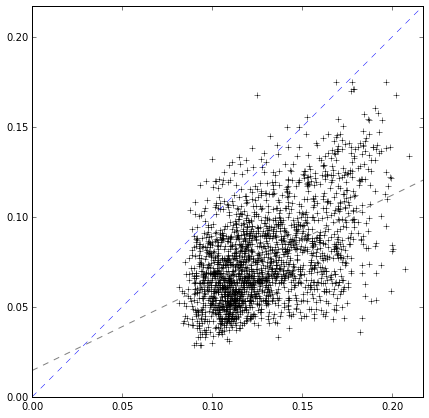

In [238]:
mask = np.array(conveds) !=0
op_cost = np.array(zip(np.array(np.array(brdf)[mask]), np.array(np.array(conveds)[mask])))
plt.figure(figsize = (7,7))
maxval = np.nanmax(op_cost)
r = scipy.stats.linregress(op_cost[:,1],op_cost[:,0])

fit = np.polyfit(op_cost[:,1],op_cost[:,0],1)
fit_fn = np.poly1d(fit)
#plt.figure(figsize = (7,7))
plt.plot(op_cost[:,1],op_cost[:,0], 'k+')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
print r